In [1]:
import sys 
sys.path.append('./models/')
from SIR import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

In [3]:
mymodel = SIRD_model()  
mymodel.train(dates_of_pandemic[:33], new_deaths[:33])

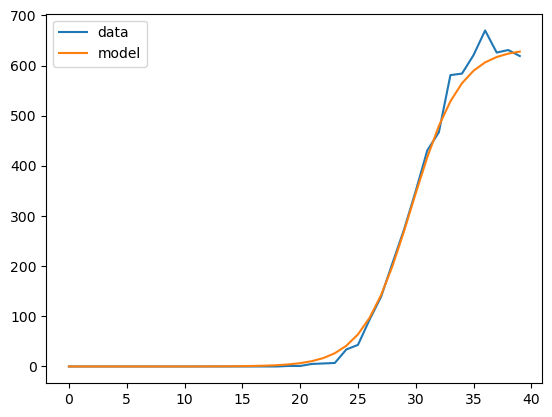

In [4]:
plt.plot(dates_of_pandemic[:40], new_deaths[:40], label='data')
pred=sir_for_optim(np.array([i for i in range(40)]), mymodel.beta, mymodel.gamma, mymodel.d)
plt.plot(dates_of_pandemic[:40], pred, label='model')
plt.legend()
plt.show()

In [5]:
pred, ints=mymodel.predict(7,0.05)

In [6]:
ints

[array([0., 0., 0., 0., 0., 0., 0.]),
 array([1072.99709688, 1158.33163704, 1230.02417912, 1240.91021031,
        1254.03273277, 1261.42550224, 1272.7903838 ])]

In [7]:
print(mymodel.beta, mymodel.gamma, mymodel.d)
print(mymodel.beta_sampled)

0.47469723393477037 1.1186056359623869e-17 0.0006394016064400492
[0.6167696215938825, 0.38532068624876215, 0.3970580696212421, 0.6730607409328391, 0.4459055802008143, 0.6278921070862843, 0.6152287833149641, 0.29817893526598815, 0.4390748915455413, 0.3617424686529238, 0.5825087701124372, 0.4552736779796235, 0.39165489414631344, 0.5254107283725046, 0.3090605412145044, 0.6636625853343273, 0.31992948528106435, 0.4543258928216649, 0.7406881938835992, 0.7491354468196609, 0.24615973274118386, 0.6602803670339507, 0.3510392079644859, 0.2638128816830681, 0.39160800657560013, 0.7098212921727265, 0.6160013252655029, 0.46861589899261535, 0.5431410125187363, 0.5478801633981324, 0.5269454551746209, 0.5044591578065043, 0.4773876450578511, 0.42585600364521103, 0.2707857275026339, 0.3656715370887426, 0.3010800901430898, 0.5292258263560121, 0.44360758074226464, 0.6121269069635045, 0.6516841704749419, 0.3951644785803255, 0.45642434171068136, 0.6877448935421231, 0.532625033332616, 0.38453339131195513, 0.55

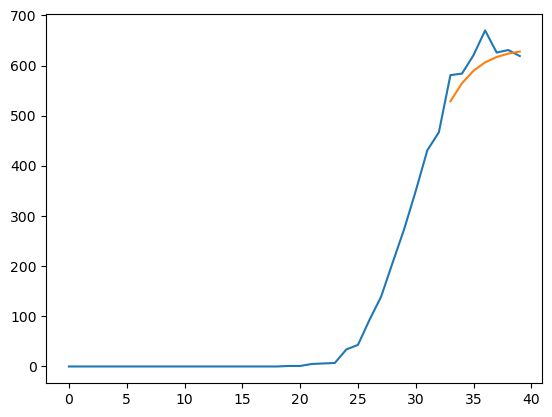

In [8]:
plt.plot(dates_of_pandemic[:40], new_deaths[:40], label='data')
plt.plot(dates_of_pandemic[33:40], pred, label='model')

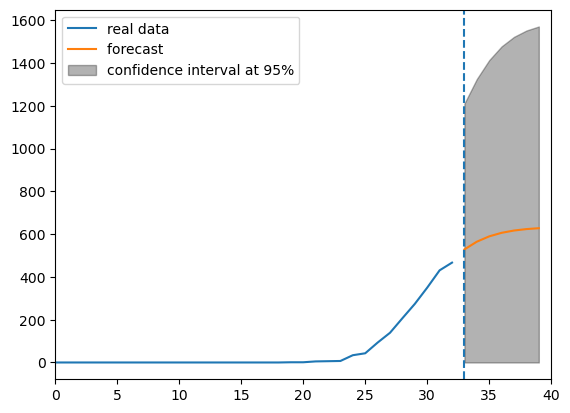

In [9]:
mymodel.plot(7,0.05)

In [10]:
beta=mymodel.beta
gamma=mymodel.gamma
d=mymodel.d

pred=sir_for_optim(np.array([i for i in range((122))]), beta, gamma, d)

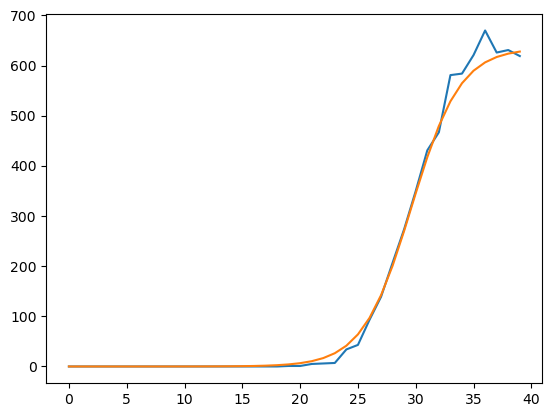

In [11]:
plt.plot(new_deaths[:40])
plt.plot(pred[:40])